In [1]:
# If you aggregate the predictions of a group of predictors (regressors or classifiers), you will often get 
# better predictions than with the best individual predictor. A group of predictors is called ensemble; thus, this
# technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.
# Ensemble methods work best when the predictors are as independent from one another as possible. One way to get 
# diverse classifiers is to train them using different algorithms.
# The following code creates and trains a voting classifier in Scikit-Learn, composed of three diverse classifiers:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard")

voting_clf.fit(X_train, y_train)

# There you have it! The voting classifier slightly outperforms all the individual classifiers.

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [2]:
# Let's look at each classifier's accuracy on the test set:

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [3]:
# If all classifiers can estimate the class probabilities, you can tell Scikit-Learn to predict the class with the
# highest class probability, averaged over all the individual classifeirs. This is called soft voting.
# It often achieves better performance than hard voting because it gives more weight to highly confident weights.

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True , random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="soft")

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [4]:
# Now let's look at these classifiers accuracy:

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
# It achieves higher performance than hard voting because it gives more weight to highly confident votes.

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


In [11]:
# Bagging means bootstrap+aggregating and it is a ensemble method in which we first bootstrap our data and for 
# each bootstrap sample we train one model. After that, we aggregate them with equal weights. When it’s not used 
# replacement, the method is called pasting.
# Scikit-Learn provides a simple API for both bagging and pasting with the BaggingClassifier class (or 
# BaggingRegressor class). 
# The following code trains an ensemble of 500 DecisionTree classifiers, each trained on 100 training instances
# randomly sampled from the training set with replacement (bagging). 
# You can alternatively set bootstrap=False for pasting.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate
# class probabilities i.e, predict_proba() method.

In [12]:
# Let's measure it's accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.92

In [14]:
# Let's prepare a Decision Tree for the same and measure its accuracy
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_pred, y_test)

# We can clearly see the BaggingClafssifier is performing much better than a individual DecisionTreeClassifier.

0.856

In [46]:
# Now, let's define a function to plot decision boundaries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(x1, x2, y_pred, cmap=custom_cmap2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

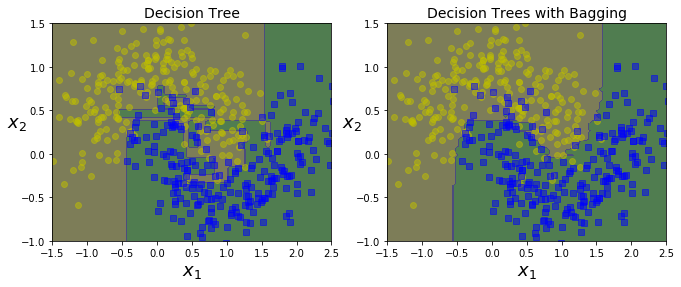

In [50]:
# Given figure compares the decision boundary of a single Decision Tree with the decision boundary of a bagging
# ensemble of 500 trees, both trained on the moons dataset.
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.savefig("decision_tree_without_and_with_bagging_plot")
plt.show()

# As you can see, the ensemble's predictions will likely generalize much better than the single Decision Tree's 
# predictions: the ensemble has a comparable bias but a smaller variance.

In [51]:
# With bagging, some instances may be sampled several times for any given predictor, while others may not be 
# sampled at all. Only about 63% of the training instances are sampled on average for each predictor. The
# remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that
# they are not the same for all predictors.
# Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without
# the need for a separate validation set or cross-valdiation.
# In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to request an automatic oob
# evaluation after training. The resulting score is available through oob_score_ variable:

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

# According to this oob evaluation, this BaggingClassifier is likely to achieve about 89.8% accuracy.

0.8986666666666666

In [52]:
# Let's verify the above:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# We get 91.2% accuracy on the test set--close enough!

0.912

In [55]:
# The oob decision function for each instance is also available through the oob_decision_function_ variable. In 
# this case the decision function returns the class probabilities for each training instance since base estimator
# has a predict_proba() method

bag_clf.oob_decision_function_

# For example, the oob evaluation estimates that the second training instance has a 36.7% probability of belonging
# to the negative class and (63.2% of belonging to the positive class)

array([[0.42245989, 0.57754011],
       [0.36746988, 0.63253012],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08092486, 0.91907514],
       [0.31016043, 0.68983957],
       [0.02439024, 0.97560976],
       [0.99438202, 0.00561798],
       [0.9726776 , 0.0273224 ],
       [0.73626374, 0.26373626],
       [0.        , 1.        ],
       [0.7989418 , 0.2010582 ],
       [0.87301587, 0.12698413],
       [0.97282609, 0.02717391],
       [0.04945055, 0.95054945],
       [0.00473934, 0.99526066],
       [0.98421053, 0.01578947],
       [0.89534884, 0.10465116],
       [0.99425287, 0.00574713],
       [0.0212766 , 0.9787234 ],
       [0.35757576, 0.64242424],
       [0.90547264, 0.09452736],
       [1.        , 0.        ],
       [0.98876404, 0.01123596],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65142857, 0.34857143],
       [0.

Sampling both training and features is called the **Random Patches method**. 

Keeping all training instances (bootstrap=False and max_samples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called the **Random Subspaces method**.

In [58]:
# Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the
# RandomForestClassifier class, which is more convenient and optimized for Decision Trees. 
# The following code trains a Random Forest classifier with 500 trees (each limited to a maximum of 16 nodes), 
# using all available CPU cores:

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# A RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier, plus all the hyperparameters 
# of a BaggingClassifier to control the ensemble itself. It introduces extra randomness when growing trees;
# instead of searching for the very best feature when splitting a node, it searches for the best feature among a 
# random subset of features.

0.912

In [60]:
# The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42), 
        n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [64]:
# In Random Forests it is also possible to make trees even more random by also using random thresholds for each 
# feature rathen than searching for the best possible thresholds. A forest of such extremely random trees is 
# called an Extremely Randomized Tree ensemble (or Extra-Trees for short).
# You can create Extra-Trees using Scikit-Learn's ExtraTreesClassifier class (or ExtraTreesRegressor class).

from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
ext_clf.fit(X_train, y_train)
y_pred = ext_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [68]:
# Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce
# impurity on average (across all the trees in the forest). More precisely, it is a weighted average, where each 
# node's weight is equal to the number of training samples that are associated with it.
# You can access the result using the feature_importances_ variable.

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)
    
# It seems that the most important features are the petal length (42%) and width (45%), while sepal length (9%) 
# and width (2%) are rather unimporant in comparison.

sepal length (cm) 0.0917272950147684
sepal width (cm) 0.024165340358941523
petal length (cm) 0.4295782256321748
petal width (cm) 0.45452913899411473


In [72]:
# Let's explore what features are important in MNIST dataset.
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train.reshape(60000, 784), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

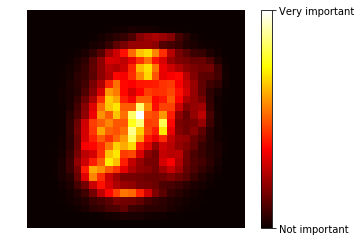

In [76]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")
    
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not important", "Very important"])
plt.savefig("mnist_feature_importance_plot")
plt.show()

# Random Forests are very handy to get a quick understanding of what features actually matter, in particular if 
# you need to perfrom feature selection.

In [79]:
# Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general
# idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.
# Most popular boosting methods are: AdaBoost (Adaptive Boosting) and Gradient Boosting.

# One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances
# that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This
# is the technique used by AdaBoost. Scikit-Learn uses a multiclass version of AdaBoost called SAMME (Stagewise
# Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is 
# equivalent to AdaBoost. Moreover, if predictors can estimate class probabilities, Scikit-Learn can use a variant
# of SAMME called SAMMER.R (the R stands for "Real"), which relies on class probabilities rather than predictions.

# The following code trains an AdaBoost Classifier based on 200 Decision stumps. A Decision Stump is a Decision
# Tree with max_depth=1 i.e., a tree composed of a single decision node plus two leaf nodes.

from sklearn.ensemble import AdaBoostClassifier

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=200,
        algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

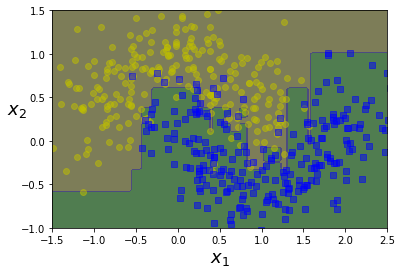

In [82]:
# Let's have a look at AdaBoostClassifier's decision boundary
plot_decision_boundary(ada_clf, X, y)

In [106]:
# Another very popular Boosting algorithm is Gradient Boosting. Instead of tweaking the instance weights at every
# iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the 
# previous predictor.
# Let's go through a simple regression example using Decision Trees as the base predictors. This is called
# Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT).

from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

# Now train a second DecisionTreeRegressor on the residual errors amde by the first predictor:
y2 = y - (tree_reg1.predict(X))
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

# Then we train a third regressor on the residual errors made by the second predictor:
y3 = y2 - (tree_reg2.predict(X))
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

# Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up 
# the predictions of all the trees:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

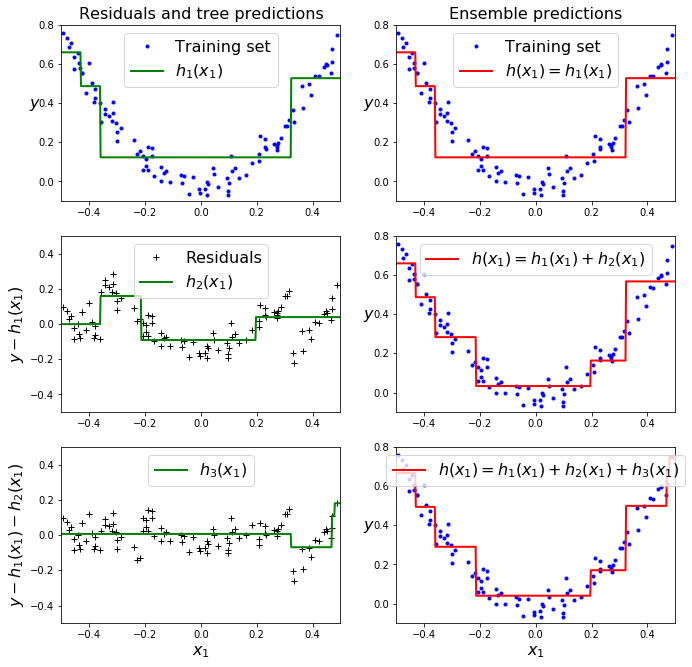

In [107]:
# The figure represents the predictions of above three trees in the left column, and the ensemble's predictions in
# the right column.
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)


plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.savefig("gradient_boosting_plot")
plt.show()

In [108]:
# A simpler way to train GBRT ensembles is to use Scikit-Learn's GradientBoostingRegressor class:

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

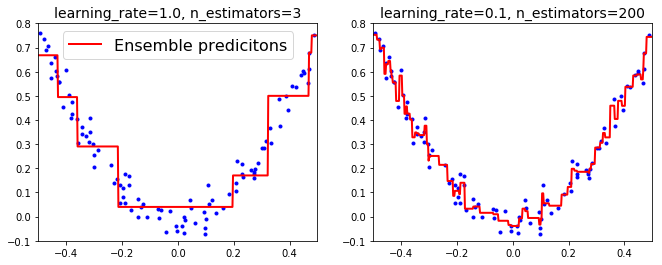

In [109]:
# The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 
# 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually 
# generalize better. This is a regularization rechnique called shrinkage.

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predicitons")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.savefig("gbrt_learning_rate_plot")
plt.show()
# The given figure shows two GBRT ensembles trained with a low learning rate: the one on the left does not have 
# enough trees to fit the training set, while the one on the right has too many trees and overfits the training
# set.

In [112]:
# In order to find the optimal number of trees, you can use early stopping. A simple way to implement this is to 
# use the staged_predict() method: it returns an iterator over the predictions made by the ensemble at each stage 
# of training (with one tree, two trees, etc.)
# The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of 
# training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal
# number of trees:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=47, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
bst_n_estimators

# So the optimal number of trees comes out to be 47.

47

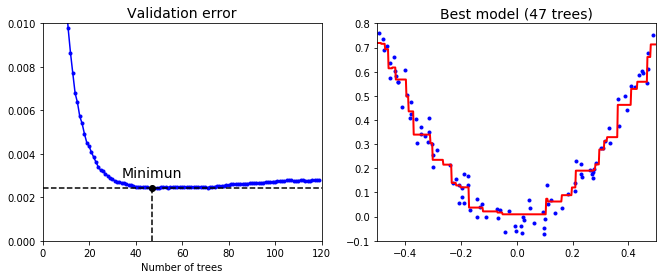

In [142]:
# The validation errors are represented on the left, and the best model's predictions are represented on the right
min_error = min(errors)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimun", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.savefig("early_stopping_gbrt_plot")
plt.show()

In [146]:
# It is also possible to implement early stopping by actually stopping training early (instead of training a 
# large number of trees first and then looking back to find the optimal number). You can do so by setting 
# warm_start=True, which makes Scikit-Learn keep existing trees when the fit() method is called, allowing 
# incremental training. 
# The following code stops training when the validation error does not improve for five iterations in a row:

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break # early stopping
            
# The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of 
# training instances to be used for training each tree. For example, if subsample=0.25, then each tree is trained
# on 25% of the training instances, selected randomly. This technique is called Stochastic Gradient Boosting.

In [147]:
# Load the MNIST data and split it into a training set and a testing set.
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [148]:
# Now train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)

estimators = [rnd_clf, extra_trees_clf, svm_clf]
for estimator in estimators:
    print("Training the: ", estimator)
    estimator.fit(X_train.reshape(60000, 784), y_train)


Training the:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the:  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the:  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [154]:
# Let's combine them into an ensemble, using a soft or hard voting classifier.
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("rnd_clf", rnd_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
]

voting_clf = VotingClassifier(named_estimators, n_jobs=-1)
voting_clf.fit(X_train.reshape(60000, 784), y_train)
voting_clf.score(X_test.reshape(10000, 784), y_test)

0.9513

In [155]:
# The estimators used are:
voting_clf.estimators

[('rnd_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('svm_clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hi

In [156]:
[estimator.score(X_test.reshape(10000, 784), y_test) for estimator in voting_clf.estimators_]

[0.9492, 0.9501, 0.8579]

In [157]:
# Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to None
# using set_params() like this:

voting_clf.set_params(svm_clf=None)

# The updated list of estimators is:
voting_clf.estimators

[('rnd_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('svm_clf', None)]

In [158]:
# However, it did not update the list of trained estimators

voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', r

In [162]:
# Now let's evaluate the VotingClassifier again:
voting_clf.score(X_test.reshape(10000, 784), y_test)

# Leads to lower accuracy!

0.9441

In [163]:
# Now let's try using a soft voting classifier. We do not actually need to retrain the classifier, we can just
# set voting to "soft":

voting_clf.voting = "soft"
voting_clf.score(X_test.reshape(10000, 784), y_test)

0.9616